# AIM0401D2203 Lab 2 Basic Text Processing
---
Text preprocessing adalah suatu proses untuk menyeleksi data text agar menjadi lebih terstruktur lagi sebelum dilakukan ekstraksi fitur maupun modelling dengan melalui serangkaian tahapan.

Tidak ada tahapan baku yang dilakukan untuk text preprocessing. Semua tergantung dengan jenis tugas apa yang akan diselesaikan dan pendekatan apa yang digunakan.

Contoh selengkapnya:
- https://github.com/ksnugroho/basic-text-preprocessing
- https://github.com/ksnugroho/pycon-id-2020

# 01 Simple Web Scraping

In [1]:
# Import Library yang dibutuhkan
import requests                     # Library untuk melakukan request dari website tertentu
from bs4 import BeautifulSoup       # Library untuk ekstraksi konten dalam website

Untuk website yang akan kita gunakan untuk scraping adalah website warstek.com. Website ini milik Coach Wayan dan sudah mendapatkan persetujuan untuk dijadikan objek web scraping :)

In [55]:
result = requests.get("https://warstek.com/kabel-laut/")

In [3]:
result.text

'<!DOCTYPE html>\n<html lang="id-ID">\n<head>\n<meta charset="UTF-8">\n<meta name="viewport" content="width=device-width, initial-scale=1, minimum-scale=1">\n<link rel="profile" href="http://gmpg.org/xfn/11">\n<meta name=\'robots\' content=\'index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1\'/>\n<link rel="preload" href="https://warstek.com/wp-content/plugins/rate-my-post/public/css/fonts/ratemypost.ttf" type="font/ttf" as="font" crossorigin="anonymous">\n<title>Mengenal Kabel Laut - Bagian Utama dari Internet</title>\n<meta name="description" content="Hampir seluruh internet kita melewati kabel laut, bukan satelit. Namun, meski jauh lebih murah dan cepat, kabel laut juga memiliki kelemahan"/>\n<link rel="canonical" href="https://warstek.com/kabel-laut/"/>\n<meta property="og:locale" content="id_ID"/>\n<meta property="og:type" content="article"/>\n<meta property="og:title" content="Mengenal Kabel Laut - Bagian Utama dari Internet"/>\n<meta property="og:descri

In [4]:
# Mengubah Encoding menjadi utf-8 | Jika tidak dikonversi ke utf-8 untuk karakter khusus 
# seperti ",'/- dll akan menjadi karakter yang sulit dipahami
result.encoding = result.apparent_encoding
result.encoding

'utf-8'

In [6]:
wp = BeautifulSoup(result.text, "html.parser")

Mengambil bagian html dengan tag 'p' paling awal (paragraph)
Silakan klik link wartek yang mengarah ke artikel https://warstek.com/kabel-laut/

Nah, pada artikel tersebut kita akan menemukan tag 'p' dengan klik kanan pada artikel lalu pilih 'Inspect'

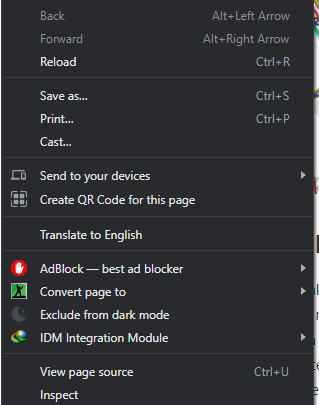

Lalu akan muncul seperti berikut,

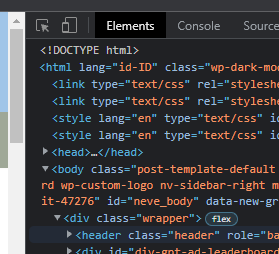

Tampilan tersebut merupakan struktur dasar dari halaman web yang berupa HTML. Struktur tersebut memiliki beberapa elemen dengan fungsinya masing - masing yang ditandai dengan adanya tag seperti `<p>`, `<img>`, `<a>`, `<table>`, `<div>` dll. Karena pada contoh kasusu ini yang akan diambil adalah bagian konten teks yang terdapat pada tag `<p>` (paragraph), maka kita akan menggunakan tag tersebut sebagai selector atau penanda.

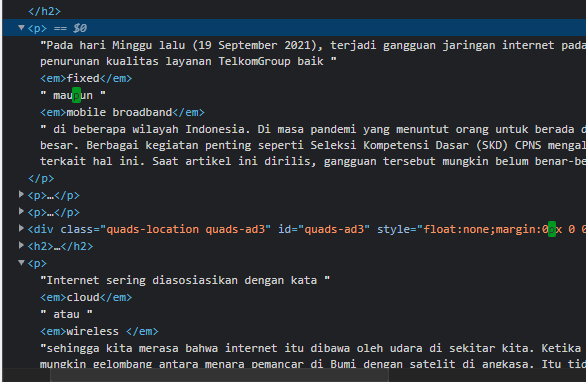

In [7]:
# Mengambil bagian html dengan tag p paling awal (paragraph)
wp.find("p")

<p>Sains dan Teknologi yang Seru dan Menyenangkan</p>

In [8]:
# Mengambil bagian html dengan tag p paling awal, tapi hanya value-nya saja.
wp.find("p").getText()

'Sains dan Teknologi yang Seru dan Menyenangkan'

In [9]:
# Mengambil bagian html dengan tag p (secara keseluruhan)
wp.find_all("p")

[<p>Sains dan Teknologi yang Seru dan Menyenangkan</p>,
 <p>Pada hari Minggu lalu (19 September 2021), terjadi gangguan jaringan internet pada Telkomsel dan Indihome. Gangguan tersebut menyebabkan penurunan kualitas layanan TelkomGroup baik <em>fixed</em> maupun <em>mobile broadband</em> di beberapa wilayah Indonesia. Di masa pandemi yang menuntut orang untuk berada di rumah seperti ini, gangguan internet tentu menjadi masalah besar. Berbagai kegiatan penting seperti Seleksi Kompetensi Dasar (SKD) CPNS mengalami penundaan. Netizen pun banyak berkomentar negatif terkait hal ini. Saat artikel ini dirilis, gangguan tersebut mungkin belum benar-benar terselesaikan.</p>,
 <p>Gangguan tersebut disebabkan oleh masalah pada sistem komunikasi kabel laut JaSuKa (Jawa, Sumatera dan Kalimantan) ruas Batam-Pontianak. Telkom memperkirakan proses perbaikan kabel laut yang terganggu akan berlangsung sekitar sebulan. Meski begitu, Telkom mencoba berbagai alternatif agar jaringan internet tetap dapat be

In [10]:
full_text = []
for paragraf in wp.find_all('p'):
  full_text.append(paragraf.getText())

full_text

['Sains dan Teknologi yang Seru dan Menyenangkan',
 'Pada hari Minggu lalu (19 September 2021), terjadi gangguan jaringan internet pada Telkomsel dan Indihome. Gangguan tersebut menyebabkan penurunan kualitas layanan TelkomGroup baik fixed maupun mobile broadband di beberapa wilayah Indonesia. Di masa pandemi yang menuntut orang untuk berada di rumah seperti ini, gangguan internet tentu menjadi masalah besar. Berbagai kegiatan penting seperti Seleksi Kompetensi Dasar (SKD) CPNS mengalami penundaan. Netizen pun banyak berkomentar negatif terkait hal ini. Saat artikel ini dirilis, gangguan tersebut mungkin belum benar-benar terselesaikan.',
 'Gangguan tersebut disebabkan oleh masalah pada sistem komunikasi kabel laut JaSuKa (Jawa, Sumatera dan Kalimantan) ruas Batam-Pontianak. Telkom memperkirakan proses perbaikan kabel laut yang terganggu akan berlangsung sekitar sebulan. Meski begitu, Telkom mencoba berbagai alternatif agar jaringan internet tetap dapat berjalan sebaik mungkin, meski t

> Terlihat bahwa link text masih banyak whitespace atau spasi kosong yang terdapat pada list sehingga perlu dibersihkan juga.

In [11]:
# Menghapus None dari list full_text sekaligus membersihkan elemen list dari whitespace menggunakan fungsi strip()
# List Comprehension
full_text = [paragraf.strip() for paragraf in full_text if paragraf != ""]
full_text

['Sains dan Teknologi yang Seru dan Menyenangkan',
 'Pada hari Minggu lalu (19 September 2021), terjadi gangguan jaringan internet pada Telkomsel dan Indihome. Gangguan tersebut menyebabkan penurunan kualitas layanan TelkomGroup baik fixed maupun mobile broadband di beberapa wilayah Indonesia. Di masa pandemi yang menuntut orang untuk berada di rumah seperti ini, gangguan internet tentu menjadi masalah besar. Berbagai kegiatan penting seperti Seleksi Kompetensi Dasar (SKD) CPNS mengalami penundaan. Netizen pun banyak berkomentar negatif terkait hal ini. Saat artikel ini dirilis, gangguan tersebut mungkin belum benar-benar terselesaikan.',
 'Gangguan tersebut disebabkan oleh masalah pada sistem komunikasi kabel laut JaSuKa (Jawa, Sumatera dan Kalimantan) ruas Batam-Pontianak. Telkom memperkirakan proses perbaikan kabel laut yang terganggu akan berlangsung sekitar sebulan. Meski begitu, Telkom mencoba berbagai alternatif agar jaringan internet tetap dapat berjalan sebaik mungkin, meski t

In [12]:
full_text = ' '.join(full_text)
full_text

'Sains dan Teknologi yang Seru dan Menyenangkan Pada hari Minggu lalu (19 September 2021), terjadi gangguan jaringan internet pada Telkomsel dan Indihome. Gangguan tersebut menyebabkan penurunan kualitas layanan TelkomGroup baik fixed maupun mobile broadband di beberapa wilayah Indonesia. Di masa pandemi yang menuntut orang untuk berada di rumah seperti ini, gangguan internet tentu menjadi masalah besar. Berbagai kegiatan penting seperti Seleksi Kompetensi Dasar (SKD) CPNS mengalami penundaan. Netizen pun banyak berkomentar negatif terkait hal ini. Saat artikel ini dirilis, gangguan tersebut mungkin belum benar-benar terselesaikan. Gangguan tersebut disebabkan oleh masalah pada sistem komunikasi kabel laut JaSuKa (Jawa, Sumatera dan Kalimantan) ruas Batam-Pontianak. Telkom memperkirakan proses perbaikan kabel laut yang terganggu akan berlangsung sekitar sebulan. Meski begitu, Telkom mencoba berbagai alternatif agar jaringan internet tetap dapat berjalan sebaik mungkin, meski tentu tida

# 02 Text Preprocessing

In [13]:
# NLTK, library NLP di bahasa pemrograman python
import nltk

# Regex (re), library untuk mengenali dan memanipulasi pola text
import re

from nltk.corpus import stopwords #daftar kata informasi rendah (stop word)
from nltk.stem import PorterStemmer #Stemmer
from nltk.stem import WordNetLemmatizer # lemmatizatiom
from nltk import word_tokenize #tokenizer untuk tokenisasi kata
import requests

In [14]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nycht\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nycht\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nycht\AppData\Roaming\nltk_data...


True

## Import teks dari file eksternal


In [15]:
text = requests.get('https://github.com/rasyidev/well-known-datasets/raw/main/at_school.txt').text
text

'At school\r\nLucas goes to school every day of the week. He has many subjects to go to each school day: English, art, science, mathematics, gym, and history. His mother packs a big backpack full of books and lunch for Lucas.\r\n\r\nHis first class is English, and he likes that teacher very much. His English teacher says that he is a good pupil, which Lucas knows means that she thinks he is a good student.\r\n\r\nHis next class is art. He draws on paper with crayons and pencils and sometimes uses a ruler. Lucas likes art. It is his favorite class.\r\n\r\nHis third class is science. This class is very hard for Lucas to figure out, but he gets to work with his classmates a lot, which he likes to do. His friend, Kyle, works with Lucas in science class, and they have fun.\r\n\r\nThen Lucas gets his break for lunch. He sits with Kyle while he eats. The principal, or the headmaster as some call him, likes to walk around and talk to students during lunch to check that they are all behaving.\r

In [16]:
# Print text
text

'At school\r\nLucas goes to school every day of the week. He has many subjects to go to each school day: English, art, science, mathematics, gym, and history. His mother packs a big backpack full of books and lunch for Lucas.\r\n\r\nHis first class is English, and he likes that teacher very much. His English teacher says that he is a good pupil, which Lucas knows means that she thinks he is a good student.\r\n\r\nHis next class is art. He draws on paper with crayons and pencils and sometimes uses a ruler. Lucas likes art. It is his favorite class.\r\n\r\nHis third class is science. This class is very hard for Lucas to figure out, but he gets to work with his classmates a lot, which he likes to do. His friend, Kyle, works with Lucas in science class, and they have fun.\r\n\r\nThen Lucas gets his break for lunch. He sits with Kyle while he eats. The principal, or the headmaster as some call him, likes to walk around and talk to students during lunch to check that they are all behaving.\r

## Membuat Text menjadi Lowercase
Mengubah kata menjadi huruf kecil (NLP -> nlp).

Kata-kata seperti Buku dan buku memiliki arti yang sama tetapi ketika tidak diubah menjadi huruf kecil, keduanya direpresentasikan sebagai dua kata yang berbeda dalam model ruang vektor.

In [17]:
text = text.lower()
text

'at school\r\nlucas goes to school every day of the week. he has many subjects to go to each school day: english, art, science, mathematics, gym, and history. his mother packs a big backpack full of books and lunch for lucas.\r\n\r\nhis first class is english, and he likes that teacher very much. his english teacher says that he is a good pupil, which lucas knows means that she thinks he is a good student.\r\n\r\nhis next class is art. he draws on paper with crayons and pencils and sometimes uses a ruler. lucas likes art. it is his favorite class.\r\n\r\nhis third class is science. this class is very hard for lucas to figure out, but he gets to work with his classmates a lot, which he likes to do. his friend, kyle, works with lucas in science class, and they have fun.\r\n\r\nthen lucas gets his break for lunch. he sits with kyle while he eats. the principal, or the headmaster as some call him, likes to walk around and talk to students during lunch to check that they are all behaving.\r

## Menghilangkan karakter khusus pada text

In [18]:
text = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", text)
text

# Untuk karakter new line (\n) akan diproses pada proses tokenisasi

'at school\r\nlucas goes to school every day of the week he has many subjects to go to each school day english art science mathematics gym and history his mother packs a big backpack full of books and lunch for lucas\r\n\r\nhis first class is english and he likes that teacher very much his english teacher says that he is a good pupil which lucas knows means that she thinks he is a good student\r\n\r\nhis next class is art he draws on paper with crayons and pencils and sometimes uses a ruler lucas likes art it is his favorite class\r\n\r\nhis third class is science this class is very hard for lucas to figure out but he gets to work with his classmates a lot which he likes to do his friend kyle works with lucas in science class and they have fun\r\n\r\nthen lucas gets his break for lunch he sits with kyle while he eats the principal or the headmaster as some call him likes to walk around and talk to students during lunch to check that they are all behaving\r\n\r\nthe next class is mathem

## Menghubah teks menjadi token (Tokenization)

In [19]:
# word_tokenize: memisahkan karakter khusus pada kata (,./@#$%&* dll) dan memisahkan kata pada text

tokens = word_tokenize(text)
print(tokens)

['at', 'school', 'lucas', 'goes', 'to', 'school', 'every', 'day', 'of', 'the', 'week', 'he', 'has', 'many', 'subjects', 'to', 'go', 'to', 'each', 'school', 'day', 'english', 'art', 'science', 'mathematics', 'gym', 'and', 'history', 'his', 'mother', 'packs', 'a', 'big', 'backpack', 'full', 'of', 'books', 'and', 'lunch', 'for', 'lucas', 'his', 'first', 'class', 'is', 'english', 'and', 'he', 'likes', 'that', 'teacher', 'very', 'much', 'his', 'english', 'teacher', 'says', 'that', 'he', 'is', 'a', 'good', 'pupil', 'which', 'lucas', 'knows', 'means', 'that', 'she', 'thinks', 'he', 'is', 'a', 'good', 'student', 'his', 'next', 'class', 'is', 'art', 'he', 'draws', 'on', 'paper', 'with', 'crayons', 'and', 'pencils', 'and', 'sometimes', 'uses', 'a', 'ruler', 'lucas', 'likes', 'art', 'it', 'is', 'his', 'favorite', 'class', 'his', 'third', 'class', 'is', 'science', 'this', 'class', 'is', 'very', 'hard', 'for', 'lucas', 'to', 'figure', 'out', 'but', 'he', 'gets', 'to', 'work', 'with', 'his', 'classm

## Membuat Bag of Words

In [20]:
for kata in tokens:
  print(kata)

at
school
lucas
goes
to
school
every
day
of
the
week
he
has
many
subjects
to
go
to
each
school
day
english
art
science
mathematics
gym
and
history
his
mother
packs
a
big
backpack
full
of
books
and
lunch
for
lucas
his
first
class
is
english
and
he
likes
that
teacher
very
much
his
english
teacher
says
that
he
is
a
good
pupil
which
lucas
knows
means
that
she
thinks
he
is
a
good
student
his
next
class
is
art
he
draws
on
paper
with
crayons
and
pencils
and
sometimes
uses
a
ruler
lucas
likes
art
it
is
his
favorite
class
his
third
class
is
science
this
class
is
very
hard
for
lucas
to
figure
out
but
he
gets
to
work
with
his
classmates
a
lot
which
he
likes
to
do
his
friend
kyle
works
with
lucas
in
science
class
and
they
have
fun
then
lucas
gets
his
break
for
lunch
he
sits
with
kyle
while
he
eats
the
principal
or
the
headmaster
as
some
call
him
likes
to
walk
around
and
talk
to
students
during
lunch
to
check
that
they
are
all
behaving
the
next
class
is
mathematics
which
most
of
the
students
just
c

In [21]:
frekuensi_kata = {} # dictionary
for kata in tokens:
  if kata not in frekuensi_kata:
    frekuensi_kata[kata] = 1
  else:
    frekuensi_kata[kata] += 1

print(frekuensi_kata)

{'at': 1, 'school': 3, 'lucas': 8, 'goes': 1, 'to': 9, 'every': 1, 'day': 3, 'of': 4, 'the': 7, 'week': 1, 'he': 10, 'has': 3, 'many': 2, 'subjects': 1, 'go': 1, 'each': 1, 'english': 3, 'art': 3, 'science': 3, 'mathematics': 3, 'gym': 3, 'and': 9, 'history': 2, 'his': 11, 'mother': 1, 'packs': 1, 'a': 7, 'big': 1, 'backpack': 1, 'full': 1, 'books': 1, 'lunch': 3, 'for': 3, 'first': 1, 'class': 9, 'is': 13, 'likes': 4, 'that': 4, 'teacher': 3, 'very': 4, 'much': 1, 'says': 1, 'good': 3, 'pupil': 1, 'which': 3, 'knows': 1, 'means': 1, 'she': 1, 'thinks': 1, 'student': 1, 'next': 2, 'draws': 1, 'on': 1, 'paper': 1, 'with': 4, 'crayons': 1, 'pencils': 1, 'sometimes': 1, 'uses': 1, 'ruler': 1, 'it': 2, 'favorite': 1, 'third': 1, 'this': 1, 'hard': 2, 'figure': 1, 'out': 1, 'but': 2, 'gets': 2, 'work': 1, 'classmates': 1, 'lot': 1, 'do': 1, 'friend': 1, 'kyle': 3, 'works': 1, 'in': 2, 'they': 2, 'have': 1, 'fun': 1, 'then': 1, 'break': 1, 'sits': 1, 'while': 1, 'eats': 1, 'principal': 1, 'o

In [28]:
# Cetak total kata unik (tanpa duplikat)
len(frekuensi_kata.keys())

120

## Menghilangkan Stop Word


In [29]:
# Print daftar stop words dalam bahasa inggris
# Stop word ini untuk setiap project dapat disesuaikan
# Untuk bahasa Indonesia, ganti parameter menjadi 'Indonesian"
print(stopwords.words('english'))
print(len(stopwords.words('english')))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [30]:
en_stop_words = stopwords.words('english')

In [31]:
"me" in en_stop_words

True

In [32]:
# Menghapus kata yang termasuk ke dalam stopwords bahasa inggris
kata_unik = list(frekuensi_kata.keys())
for kata in kata_unik:
  if kata in en_stop_words:
    del frekuensi_kata[kata]

# Update kata unik setelah penghapusan stopwords
kata_unik = list(frekuensi_kata.keys())

In [33]:
len(frekuensi_kata.keys())

81

## Stemming dan Lematization
Membandingkan hasil dari Lematization dan Stemming
- Kata Asli | Lemmatize | Lematize -> Stemming | Stemming -> Lemmatize

In [36]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Nycht\AppData\Roaming\nltk_data...


True

In [34]:
# Instansiasi objek dari Class PorterStemmer dan WordNetLemmatizer (Bahasa Inggris)
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [37]:
for kata in kata_unik:
  print(kata, '|', lemmatizer.lemmatize(kata),'|',stemmer.stem(kata) , '|', lemmatizer.lemmatize(stemmer.stem(kata)), '|', stemmer.stem(lemmatizer.lemmatize(kata)))

school | school | school | school | school
lucas | lucas | luca | luca | luca
goes | go | goe | goe | go
every | every | everi | everi | everi
day | day | day | day | day
week | week | week | week | week
many | many | mani | mani | mani
subjects | subject | subject | subject | subject
go | go | go | go | go
english | english | english | english | english
art | art | art | art | art
science | science | scienc | scienc | scienc
mathematics | mathematics | mathemat | mathemat | mathemat
gym | gym | gym | gym | gym
history | history | histori | histori | histori
mother | mother | mother | mother | mother
packs | pack | pack | pack | pack
big | big | big | big | big
backpack | backpack | backpack | backpack | backpack
full | full | full | full | full
books | book | book | book | book
lunch | lunch | lunch | lunch | lunch
first | first | first | first | first
class | class | class | class | class
likes | like | like | like | like
teacher | teacher | teacher | teacher | teacher
much | much | 

In [38]:
# Menggunakan pos pada lemmatizer untuk menentukan part of speech atau kategori kata
print(lemmatizer.lemmatize('exercising'))
print(lemmatizer.lemmatize('exercising', pos = 'v'))

exercising
exercise


In [40]:
token_no_stop_words = [kata for kata in tokens if kata not in en_stop_words]
token_lemmatized = [lemmatizer.lemmatize(kata) for kata in token_no_stop_words]

frekuensi_kata_postprocessing = {}
for kata in token_lemmatized:
  if kata not in frekuensi_kata_postprocessing:
    frekuensi_kata_postprocessing[kata] = 1
  else:
    frekuensi_kata_postprocessing[kata] += 1


frekuensi_kata_postprocessing.keys()

dict_keys(['school', 'lucas', 'go', 'every', 'day', 'week', 'many', 'subject', 'english', 'art', 'science', 'mathematics', 'gym', 'history', 'mother', 'pack', 'big', 'backpack', 'full', 'book', 'lunch', 'first', 'class', 'like', 'teacher', 'much', 'say', 'good', 'pupil', 'know', 'mean', 'think', 'student', 'next', 'draw', 'paper', 'crayon', 'pencil', 'sometimes', 'us', 'ruler', 'favorite', 'third', 'hard', 'figure', 'get', 'work', 'classmate', 'lot', 'friend', 'kyle', 'fun', 'break', 'sits', 'eats', 'principal', 'headmaster', 'call', 'walk', 'around', 'talk', 'check', 'behaving', 'math', 'trouble', 'getting', 'grade', 'nice', 'helpful', 'fourth', 'exercising', 'last', 'time', 'staying', 'awake', 'lesson', 'boring', 'tired'])

In [41]:
# Membandingkan jumlah kata unik sebelum dan setelah preprocessing dengan melihat isi dari bag of words
print(len(frekuensi_kata))
print(len(frekuensi_kata_postprocessing))

81
78


# 03 Text Preprocessing teks Bahasa Indonesia

## Import teks dari file eksternal

In [42]:
text = requests.get('https://github.com/rasyidev/well-known-datasets/raw/main/rendang.txt').text
text

'Rendang dinobatkan menjadi salah satu makanan terenak di dunia. Makanan khas Sumatera Barat ini memang digemari banyak orang, baik di Indonesia maupun mancanegara. Rendang semula merupakan menu utama di rumah makan yang berasal dari Sumatera Barat yang dikenal dengan masakan Padang. Rendang khas Minang adalah yang paling enak dan mendunia. Masakan ini memiliki tampilan yang menyisakan potongan daging berwarna coklat kehitaman dan kering.\r\n\r\nDalam tradisi Minangkabau, rendang dianggap sebagai makanan kehormatan dalam acara adat seperti perayaan adat, pernikahan dan acara penting lainnya. Ketika istana negara sedang menerima kunjungan dari negara lain, rendang pun sering disajikan untuk para tamu. Bagi masyarakat Minang, rendang memiliki filosofi yang berarti kesabaran, kebijakan dan ketekunan. Hal inilah yang menjadi kebanggaan masyarakat minang di manapun mereka berpijak serta menjadi identitas sebagai makanan khas Indonesia di mata dunia.\r\n\r\nDalam proses pembuatannya, diolah 

## Membuat Text Menjadi Lowercase

In [43]:
text = text.lower()
text

'rendang dinobatkan menjadi salah satu makanan terenak di dunia. makanan khas sumatera barat ini memang digemari banyak orang, baik di indonesia maupun mancanegara. rendang semula merupakan menu utama di rumah makan yang berasal dari sumatera barat yang dikenal dengan masakan padang. rendang khas minang adalah yang paling enak dan mendunia. masakan ini memiliki tampilan yang menyisakan potongan daging berwarna coklat kehitaman dan kering.\r\n\r\ndalam tradisi minangkabau, rendang dianggap sebagai makanan kehormatan dalam acara adat seperti perayaan adat, pernikahan dan acara penting lainnya. ketika istana negara sedang menerima kunjungan dari negara lain, rendang pun sering disajikan untuk para tamu. bagi masyarakat minang, rendang memiliki filosofi yang berarti kesabaran, kebijakan dan ketekunan. hal inilah yang menjadi kebanggaan masyarakat minang di manapun mereka berpijak serta menjadi identitas sebagai makanan khas indonesia di mata dunia.\r\n\r\ndalam proses pembuatannya, diolah 

## Menghilangkan karakter khusus pada teks

In [44]:
text = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", text)
text

'rendang dinobatkan menjadi salah satu makanan terenak di dunia makanan khas sumatera barat ini memang digemari banyak orang baik di indonesia maupun mancanegara rendang semula merupakan menu utama di rumah makan yang berasal dari sumatera barat yang dikenal dengan masakan padang rendang khas minang adalah yang paling enak dan mendunia masakan ini memiliki tampilan yang menyisakan potongan daging berwarna coklat kehitaman dan kering\r\n\r\ndalam tradisi minangkabau rendang dianggap sebagai makanan kehormatan dalam acara adat seperti perayaan adat pernikahan dan acara penting lainnya ketika istana negara sedang menerima kunjungan dari negara lain rendang pun sering disajikan untuk para tamu bagi masyarakat minang rendang memiliki filosofi yang berarti kesabaran kebijakan dan ketekunan hal inilah yang menjadi kebanggaan masyarakat minang di manapun mereka berpijak serta menjadi identitas sebagai makanan khas indonesia di mata dunia\r\n\r\ndalam proses pembuatannya diolah dengan bahan dag

## Mengubah teks menjadi token (Tokenization)

In [45]:
tokens = word_tokenize(text)
print(tokens)

['rendang', 'dinobatkan', 'menjadi', 'salah', 'satu', 'makanan', 'terenak', 'di', 'dunia', 'makanan', 'khas', 'sumatera', 'barat', 'ini', 'memang', 'digemari', 'banyak', 'orang', 'baik', 'di', 'indonesia', 'maupun', 'mancanegara', 'rendang', 'semula', 'merupakan', 'menu', 'utama', 'di', 'rumah', 'makan', 'yang', 'berasal', 'dari', 'sumatera', 'barat', 'yang', 'dikenal', 'dengan', 'masakan', 'padang', 'rendang', 'khas', 'minang', 'adalah', 'yang', 'paling', 'enak', 'dan', 'mendunia', 'masakan', 'ini', 'memiliki', 'tampilan', 'yang', 'menyisakan', 'potongan', 'daging', 'berwarna', 'coklat', 'kehitaman', 'dan', 'kering', 'dalam', 'tradisi', 'minangkabau', 'rendang', 'dianggap', 'sebagai', 'makanan', 'kehormatan', 'dalam', 'acara', 'adat', 'seperti', 'perayaan', 'adat', 'pernikahan', 'dan', 'acara', 'penting', 'lainnya', 'ketika', 'istana', 'negara', 'sedang', 'menerima', 'kunjungan', 'dari', 'negara', 'lain', 'rendang', 'pun', 'sering', 'disajikan', 'untuk', 'para', 'tamu', 'bagi', 'masya

## Menghilangkan Stop Words dalam bahasa Indonesia

In [46]:
# Install library Sastrawi

!pip install Sastrawi

     -------------------------------------- 209.7/209.7 kB 3.2 MB/s eta 0:00:00


In [47]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

stopword_remover_factory = StopWordRemoverFactory()
stemmer_factory = StemmerFactory()
ina_stemmer = stemmer_factory.create_stemmer()
ina_stopword = stopword_remover_factory.create_stop_word_remover()

print(stopword_remover_factory.get_stop_words())

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [48]:
# Membuat kalimat baru dari token yang sudah dibuat sebagai parameter untuk dapat digunakan pada fungsi ina_stopword.remove()
text_from_token = ' '.join(tokens)
print(text_from_token)

text_from_token_no_stop_words = ina_stopword.remove(text_from_token)

# Mengubah kalimat yang sudah tidak terdapat stop words menjadi token lagi
# token = word_tokenize(text_from_token_no_stop_words)
# token

rendang dinobatkan menjadi salah satu makanan terenak di dunia makanan khas sumatera barat ini memang digemari banyak orang baik di indonesia maupun mancanegara rendang semula merupakan menu utama di rumah makan yang berasal dari sumatera barat yang dikenal dengan masakan padang rendang khas minang adalah yang paling enak dan mendunia masakan ini memiliki tampilan yang menyisakan potongan daging berwarna coklat kehitaman dan kering dalam tradisi minangkabau rendang dianggap sebagai makanan kehormatan dalam acara adat seperti perayaan adat pernikahan dan acara penting lainnya ketika istana negara sedang menerima kunjungan dari negara lain rendang pun sering disajikan untuk para tamu bagi masyarakat minang rendang memiliki filosofi yang berarti kesabaran kebijakan dan ketekunan hal inilah yang menjadi kebanggaan masyarakat minang di manapun mereka berpijak serta menjadi identitas sebagai makanan khas indonesia di mata dunia dalam proses pembuatannya diolah dengan bahan daging sapi yang d

## Stemming untuk Bahasa Indonesia

In [49]:
stemmed_text = ina_stemmer.stem(text_from_token_no_stop_words)
stemmed_text

'rendang nobat jadi salah satu makan enak dunia makan khas sumatera barat memang gari banyak orang baik indonesia maupun mancanegara rendang mula rupa menu utama rumah makan asal sumatera barat kenal masakan padang rendang khas mang paling enak dunia masakan milik tampil sisa potong daging warna coklat hitam kering tradisi minangkabau rendang anggap makan hormat acara adat raya adat nikah acara penting lain istana negara sedang terima kunjung negara rendang sering saji para tamu masyarakat mang rendang milik filosofi arti sabar bijak tekun ini jadi bangga masyarakat mang mana pijak jadi identitas makan khas indonesia mata dunia proses buat olah bahan daging sapi masak santan rempah khas padu rasa gurih manis pedas mampu goyang lidah siapa beberapa bumbu khas guna bawang putih bawang merah jahe lengkuas cabai merah daun kunyit daun jeruk masak lama 7 jam hasil daging sapi tekstur empuk enak nikmat proses masak butuh waktu lama hingga ada cair masakan milik cita rasa khas daging empuk ti

In [50]:
token_from_stemmed_text = word_tokenize(stemmed_text)
print(token_from_stemmed_text)

['rendang', 'nobat', 'jadi', 'salah', 'satu', 'makan', 'enak', 'dunia', 'makan', 'khas', 'sumatera', 'barat', 'memang', 'gari', 'banyak', 'orang', 'baik', 'indonesia', 'maupun', 'mancanegara', 'rendang', 'mula', 'rupa', 'menu', 'utama', 'rumah', 'makan', 'asal', 'sumatera', 'barat', 'kenal', 'masakan', 'padang', 'rendang', 'khas', 'mang', 'paling', 'enak', 'dunia', 'masakan', 'milik', 'tampil', 'sisa', 'potong', 'daging', 'warna', 'coklat', 'hitam', 'kering', 'tradisi', 'minangkabau', 'rendang', 'anggap', 'makan', 'hormat', 'acara', 'adat', 'raya', 'adat', 'nikah', 'acara', 'penting', 'lain', 'istana', 'negara', 'sedang', 'terima', 'kunjung', 'negara', 'rendang', 'sering', 'saji', 'para', 'tamu', 'masyarakat', 'mang', 'rendang', 'milik', 'filosofi', 'arti', 'sabar', 'bijak', 'tekun', 'ini', 'jadi', 'bangga', 'masyarakat', 'mang', 'mana', 'pijak', 'jadi', 'identitas', 'makan', 'khas', 'indonesia', 'mata', 'dunia', 'proses', 'buat', 'olah', 'bahan', 'daging', 'sapi', 'masak', 'santan', '

## Membuat Bag of Words dari teks Bahasa Indonesia

In [51]:
frekuensi_kata_ina = {}
for kata in token_from_stemmed_text:
  if kata not in frekuensi_kata_ina:
    frekuensi_kata_ina[kata] = 1
  else:
    frekuensi_kata_ina[kata] += 1

print(frekuensi_kata_ina)

{'rendang': 8, 'nobat': 1, 'jadi': 4, 'salah': 1, 'satu': 1, 'makan': 6, 'enak': 6, 'dunia': 4, 'khas': 7, 'sumatera': 2, 'barat': 2, 'memang': 1, 'gari': 1, 'banyak': 2, 'orang': 2, 'baik': 1, 'indonesia': 3, 'maupun': 1, 'mancanegara': 2, 'mula': 1, 'rupa': 1, 'menu': 1, 'utama': 1, 'rumah': 1, 'asal': 1, 'kenal': 2, 'masakan': 3, 'padang': 1, 'mang': 3, 'paling': 1, 'milik': 3, 'tampil': 1, 'sisa': 1, 'potong': 1, 'daging': 4, 'warna': 1, 'coklat': 1, 'hitam': 1, 'kering': 1, 'tradisi': 1, 'minangkabau': 1, 'anggap': 1, 'hormat': 1, 'acara': 2, 'adat': 2, 'raya': 1, 'nikah': 1, 'penting': 1, 'lain': 1, 'istana': 1, 'negara': 2, 'sedang': 1, 'terima': 1, 'kunjung': 1, 'sering': 1, 'saji': 1, 'para': 1, 'tamu': 1, 'masyarakat': 2, 'filosofi': 1, 'arti': 1, 'sabar': 1, 'bijak': 1, 'tekun': 1, 'ini': 2, 'bangga': 1, 'mana': 1, 'pijak': 1, 'identitas': 1, 'mata': 1, 'proses': 2, 'buat': 2, 'olah': 1, 'bahan': 1, 'sapi': 2, 'masak': 4, 'santan': 1, 'rempah': 2, 'padu': 1, 'rasa': 4, 'guri

# 04 Student Activity

1. Lakukan scraping artikel dari suatu Website (Bahasa Indonesia / English). Pilih salah satu saja.
2. Lakukan text preprocessing menggunakan library yang diperlukan
3. Lakukan point 1-2 juga untuk teks bahasa indonesia
4. Apakah terdapat perbedaan preprocessing untuk bahasa Inggris dan bahasa Indonesia? Coba sebutkan!

In [65]:
# Link yang akan di-scrape https://id.wikipedia.org/wiki/Michael_Schumacher dan https://en.wikipedia.org/wiki/Natural_language_processing

wiki_req_en = requests.get("https://en.wikipedia.org/wiki/Natural_language_processing")

In [66]:
wiki_req_en.text

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-enabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Natural language processing - Wikipedia</title>\n<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-enabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector

In [69]:
wiki_req_en.encoding = wiki_req_en.apparent_encoding
wiki_req_en.encoding

'utf-8'

In [70]:
BS_wiki_en = BeautifulSoup(wiki_req_en.text, "html.parser")
BS_wiki_en

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-enabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Natural language processing - Wikipedia</title>
<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-enabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feat

In [71]:
txt_wiki_en = []
for paragraf in BS_wiki_en.find_all('p'):
  txt_wiki_en.append(paragraf.getText())

txt_wiki_en

['Natural language processing (NLP) is an interdisciplinary subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.  The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.\n',
 'Challenges in natural language processing frequently involve speech recognition, natural-language understanding, and natural-language generation.\n',
 'Natural language processing has its roots in the 1950s. Already in 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence, though at

In [72]:
txt_wiki_en_split = [paragraf.strip() for paragraf in txt_wiki_en if paragraf != ""]
txt_wiki_en_split

['Natural language processing (NLP) is an interdisciplinary subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.  The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.',
 'Challenges in natural language processing frequently involve speech recognition, natural-language understanding, and natural-language generation.',
 'Natural language processing has its roots in the 1950s. Already in 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence, though at the

In [77]:
full_text_wiki_en = ' '.join(txt_wiki_en_split)
print(full_text_wiki_en.lower())

natural language processing (nlp) is an interdisciplinary subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.  the goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. the technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves. challenges in natural language processing frequently involve speech recognition, natural-language understanding, and natural-language generation. natural language processing has its roots in the 1950s. already in 1950, alan turing published an article titled "computing machinery and intelligence" which proposed what is now called the turing test as a criterion of intelligence, though at the time that

In [78]:
wiki_en_no_spec = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", full_text_wiki_en.lower())
wiki_en_no_spec

"natural language processing nlp is an interdisciplinary subfield of linguistics computer science and artificial intelligence concerned with the interactions between computers and human language in particular how to program computers to process and analyze large amounts of natural language data  the goal is a computer capable of understanding the contents of documents including the contextual nuances of the language within them the technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves challenges in natural language processing frequently involve speech recognition naturallanguage understanding and naturallanguage generation natural language processing has its roots in the 1950s already in 1950 alan turing published an article titled computing machinery and intelligence which proposed what is now called the turing test as a criterion of intelligence though at the time that was not articulated

In [80]:
wiki_en_tokenized = word_tokenize(wiki_en_no_spec)
print(wiki_en_tokenized)

['natural', 'language', 'processing', 'nlp', 'is', 'an', 'interdisciplinary', 'subfield', 'of', 'linguistics', 'computer', 'science', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', 'language', 'in', 'particular', 'how', 'to', 'program', 'computers', 'to', 'process', 'and', 'analyze', 'large', 'amounts', 'of', 'natural', 'language', 'data', 'the', 'goal', 'is', 'a', 'computer', 'capable', 'of', 'understanding', 'the', 'contents', 'of', 'documents', 'including', 'the', 'contextual', 'nuances', 'of', 'the', 'language', 'within', 'them', 'the', 'technology', 'can', 'then', 'accurately', 'extract', 'information', 'and', 'insights', 'contained', 'in', 'the', 'documents', 'as', 'well', 'as', 'categorize', 'and', 'organize', 'the', 'documents', 'themselves', 'challenges', 'in', 'natural', 'language', 'processing', 'frequently', 'involve', 'speech', 'recognition', 'naturallanguage', 'understanding', 'and', 'naturallanguag

In [81]:
wiki_en_freq = {} # dictionary
for kata in wiki_en_tokenized:
  if kata not in wiki_en_freq:
    wiki_en_freq[kata] = 1
  else:
    wiki_en_freq[kata] += 1

print(wiki_en_freq)

{'natural': 17, 'language': 24, 'processing': 14, 'nlp': 17, 'is': 15, 'an': 6, 'interdisciplinary': 3, 'subfield': 1, 'of': 64, 'linguistics': 9, 'computer': 4, 'science': 3, 'and': 30, 'artificial': 2, 'intelligence': 4, 'concerned': 1, 'with': 10, 'the': 68, 'interactions': 1, 'between': 1, 'computers': 2, 'human': 2, 'in': 29, 'particular': 1, 'how': 2, 'to': 25, 'program': 1, 'process': 2, 'analyze': 2, 'large': 3, 'amounts': 1, 'data': 5, 'goal': 1, 'a': 23, 'capable': 1, 'understanding': 4, 'contents': 1, 'documents': 4, 'including': 1, 'contextual': 1, 'nuances': 1, 'within': 1, 'them': 1, 'technology': 1, 'can': 5, 'then': 1, 'accurately': 1, 'extract': 1, 'information': 1, 'insights': 1, 'contained': 1, 'as': 16, 'well': 1, 'categorize': 1, 'organize': 1, 'themselves': 1, 'challenges': 1, 'frequently': 2, 'involve': 2, 'speech': 3, 'recognition': 2, 'naturallanguage': 2, 'generation': 2, 'has': 6, 'its': 2, 'roots': 1, '1950s': 1, 'already': 1, '1950': 1, 'alan': 1, 'turing':

In [83]:
len(wiki_en_freq.keys())

546

In [84]:
print(en_stop_words)
print(len(en_stop_words))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [85]:
# Menghapus kata yang termasuk ke dalam stopwords bahasa inggris
wiki_en_unique = list(wiki_en_freq.keys())
for kata in wiki_en_unique:
  if kata in en_stop_words:
    del wiki_en_freq[kata]

# Update kata unik setelah penghapusan stopwords
wiki_en_unique = list(wiki_en_freq.keys())

In [87]:
len(wiki_en_unique)

483

In [91]:
for kata in wiki_en_unique:
  print(kata, '\t\t|', lemmatizer.lemmatize(kata),'\t\t|',stemmer.stem(kata) , '\t\t|', lemmatizer.lemmatize(stemmer.stem(kata)), '\t\t|', stemmer.stem(lemmatizer.lemmatize(kata)))

natural 		| natural 		| natur 		| natur 		| natur
language 		| language 		| languag 		| languag 		| languag
processing 		| processing 		| process 		| process 		| process
nlp 		| nlp 		| nlp 		| nlp 		| nlp
interdisciplinary 		| interdisciplinary 		| interdisciplinari 		| interdisciplinari 		| interdisciplinari
subfield 		| subfield 		| subfield 		| subfield 		| subfield
linguistics 		| linguistics 		| linguist 		| linguist 		| linguist
computer 		| computer 		| comput 		| comput 		| comput
science 		| science 		| scienc 		| scienc 		| scienc
artificial 		| artificial 		| artifici 		| artifici 		| artifici
intelligence 		| intelligence 		| intellig 		| intellig 		| intellig
concerned 		| concerned 		| concern 		| concern 		| concern
interactions 		| interaction 		| interact 		| interact 		| interact
computers 		| computer 		| comput 		| comput 		| comput
human 		| human 		| human 		| human 		| human
particular 		| particular 		| particular 		| particular 		| particular
program 		| progr

In [92]:
wiki_req_id = requests.get("https://id.wikipedia.org/wiki/Michael_Schumacher")

In [93]:
wiki_req_id.text

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-enabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled" lang="id" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Michael Schumacher - Wikipedia bahasa Indonesia, ensiklopedia bebas</title>\n<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-enabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-

In [94]:
wiki_req_id.encoding = wiki_req_id.apparent_encoding
wiki_req_id.encoding

'utf-8'

In [95]:
BS_wiki_id = BeautifulSoup(wiki_req_id.text, "html.parser")
BS_wiki_id

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-enabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled" dir="ltr" lang="id">
<head>
<meta charset="utf-8"/>
<title>Michael Schumacher - Wikipedia bahasa Indonesia, ensiklopedia bebas</title>
<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-enabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limit

In [96]:
txt_wiki_id = []
for paragraf in BS_wiki_id.find_all('p'):
  txt_wiki_id.append(paragraf.getText())

txt_wiki_id

['\n',
 '\n',
 'Pembalap mobil Jerman\nJuara Dunia Formula Satu tujuh kali\n(1994, 1995, 2000, 2001, 2002, 2003, 2004)\n',
 'Eponim\n',
 'Persaingan\n',
 'Michael Schumacher, Commendatori OMRI (/ˈʃuːmɑːkər/, pengucapan bahasa Jerman:\xa0[ˈmɪçaʔeːl ˈʃuːmaxɐ]\xa0( simak), lahir 3 Januari 1969, akrab disapa Schumi,[1] Schuey,[2] atau Schu[3]), adalah seorang mantan pembalap mobil profesional dari Jerman.[4] Ia pernah berkarier di ajang balap mobil roda terbuka Formula Satu (F1) dalam dua kesempatan berbeda: yang pertama dari tahun 1991 sampai 2006 dengan bergabung bersama tim Jordan, Benetton, dan Ferrari dan yang kedua dari tahun 2010 sampai 2012 bersama tim Mercedes. Schumi memulai debut F1-nya pada lomba Grand Prix Belgia 1991. Sampai akhir kariernya di F1, ia telah menjuarai 91 perlombaan Grand Prix,[N 1] dan tujuh kali merebut gelar juara dunia yaitu pada musim 1994, 1995, 2000, 2001, 2002, 2003, dan 2004.[N 2][4]\n',
 'Merujuk pada catatan kariernya, Schumi merupakan salah satu pemb

In [97]:
txt_wiki_id_split = [paragraf.strip() for paragraf in txt_wiki_id if paragraf != ""]
txt_wiki_id_split

['',
 '',
 'Pembalap mobil Jerman\nJuara Dunia Formula Satu tujuh kali\n(1994, 1995, 2000, 2001, 2002, 2003, 2004)',
 'Eponim',
 'Persaingan',
 'Michael Schumacher, Commendatori OMRI (/ˈʃuːmɑːkər/, pengucapan bahasa Jerman:\xa0[ˈmɪçaʔeːl ˈʃuːmaxɐ]\xa0( simak), lahir 3 Januari 1969, akrab disapa Schumi,[1] Schuey,[2] atau Schu[3]), adalah seorang mantan pembalap mobil profesional dari Jerman.[4] Ia pernah berkarier di ajang balap mobil roda terbuka Formula Satu (F1) dalam dua kesempatan berbeda: yang pertama dari tahun 1991 sampai 2006 dengan bergabung bersama tim Jordan, Benetton, dan Ferrari dan yang kedua dari tahun 2010 sampai 2012 bersama tim Mercedes. Schumi memulai debut F1-nya pada lomba Grand Prix Belgia 1991. Sampai akhir kariernya di F1, ia telah menjuarai 91 perlombaan Grand Prix,[N 1] dan tujuh kali merebut gelar juara dunia yaitu pada musim 1994, 1995, 2000, 2001, 2002, 2003, dan 2004.[N 2][4]',
 'Merujuk pada catatan kariernya, Schumi merupakan salah satu pembalap terbaik

In [98]:
full_text_wiki_id = ' '.join(txt_wiki_id_split)
print(full_text_wiki_id.lower())

  pembalap mobil jerman
juara dunia formula satu tujuh kali
(1994, 1995, 2000, 2001, 2002, 2003, 2004) eponim persaingan michael schumacher, commendatori omri (/ˈʃuːmɑːkər/, pengucapan bahasa jerman: [ˈmɪçaʔeːl ˈʃuːmaxɐ] ( simak), lahir 3 januari 1969, akrab disapa schumi,[1] schuey,[2] atau schu[3]), adalah seorang mantan pembalap mobil profesional dari jerman.[4] ia pernah berkarier di ajang balap mobil roda terbuka formula satu (f1) dalam dua kesempatan berbeda: yang pertama dari tahun 1991 sampai 2006 dengan bergabung bersama tim jordan, benetton, dan ferrari dan yang kedua dari tahun 2010 sampai 2012 bersama tim mercedes. schumi memulai debut f1-nya pada lomba grand prix belgia 1991. sampai akhir kariernya di f1, ia telah menjuarai 91 perlombaan grand prix,[n 1] dan tujuh kali merebut gelar juara dunia yaitu pada musim 1994, 1995, 2000, 2001, 2002, 2003, dan 2004.[n 2][4] merujuk pada catatan kariernya, schumi merupakan salah satu pembalap terbaik sepanjang masa yang pernah membal

In [99]:
wiki_id_no_spec = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", full_text_wiki_id.lower())
wiki_id_no_spec

"  pembalap mobil jerman\njuara dunia formula satu tujuh kali\n1994 1995 2000 2001 2002 2003 2004 eponim persaingan michael schumacher commendatori omri ˈʃuːmɑːkər pengucapan bahasa jerman\xa0[ˈmɪçaʔeːl ˈʃuːmaxɐ]\xa0 simak lahir 3 januari 1969 akrab disapa schumi[1] schuey[2] atau schu[3] adalah seorang mantan pembalap mobil profesional dari jerman[4] ia pernah berkarier di ajang balap mobil roda terbuka formula satu f1 dalam dua kesempatan berbeda yang pertama dari tahun 1991 sampai 2006 dengan bergabung bersama tim jordan benetton dan ferrari dan yang kedua dari tahun 2010 sampai 2012 bersama tim mercedes schumi memulai debut f1nya pada lomba grand prix belgia 1991 sampai akhir kariernya di f1 ia telah menjuarai 91 perlombaan grand prix[n 1] dan tujuh kali merebut gelar juara dunia yaitu pada musim 1994 1995 2000 2001 2002 2003 dan 2004[n 2][4] merujuk pada catatan kariernya schumi merupakan salah satu pembalap terbaik sepanjang masa yang pernah membalap di ajang f1[5][6] ia bersama 

In [100]:
wiki_id_tokenized = word_tokenize(wiki_id_no_spec)
print(wiki_id_tokenized)

['pembalap', 'mobil', 'jerman', 'juara', 'dunia', 'formula', 'satu', 'tujuh', 'kali', '1994', '1995', '2000', '2001', '2002', '2003', '2004', 'eponim', 'persaingan', 'michael', 'schumacher', 'commendatori', 'omri', 'ˈʃuːmɑːkər', 'pengucapan', 'bahasa', 'jerman', '[', 'ˈmɪçaʔeːl', 'ˈʃuːmaxɐ', ']', 'simak', 'lahir', '3', 'januari', '1969', 'akrab', 'disapa', 'schumi', '[', '1', ']', 'schuey', '[', '2', ']', 'atau', 'schu', '[', '3', ']', 'adalah', 'seorang', 'mantan', 'pembalap', 'mobil', 'profesional', 'dari', 'jerman', '[', '4', ']', 'ia', 'pernah', 'berkarier', 'di', 'ajang', 'balap', 'mobil', 'roda', 'terbuka', 'formula', 'satu', 'f1', 'dalam', 'dua', 'kesempatan', 'berbeda', 'yang', 'pertama', 'dari', 'tahun', '1991', 'sampai', '2006', 'dengan', 'bergabung', 'bersama', 'tim', 'jordan', 'benetton', 'dan', 'ferrari', 'dan', 'yang', 'kedua', 'dari', 'tahun', '2010', 'sampai', '2012', 'bersama', 'tim', 'mercedes', 'schumi', 'memulai', 'debut', 'f1nya', 'pada', 'lomba', 'grand', 'prix', 

In [101]:
wiki_id_freq = {} # dictionary
for kata in wiki_id_tokenized:
  if kata not in wiki_id_freq:
    wiki_id_freq[kata] = 1
  else:
    wiki_id_freq[kata] += 1

print(wiki_id_freq)

{'pembalap': 77, 'mobil': 55, 'jerman': 24, 'juara': 37, 'dunia': 47, 'formula': 18, 'satu': 35, 'tujuh': 9, 'kali': 30, '1994': 14, '1995': 20, '2000': 9, '2001': 14, '2002': 18, '2003': 12, '2004': 23, 'eponim': 1, 'persaingan': 9, 'michael': 29, 'schumacher': 49, 'commendatori': 1, 'omri': 1, 'ˈʃuːmɑːkər': 1, 'pengucapan': 1, 'bahasa': 2, '[': 441, 'ˈmɪçaʔeːl': 1, 'ˈʃuːmaxɐ': 1, ']': 441, 'simak': 1, 'lahir': 4, '3': 8, 'januari': 2, '1969': 3, 'akrab': 1, 'disapa': 1, 'schumi': 391, '1': 5, 'schuey': 1, '2': 3, 'atau': 6, 'schu': 1, 'adalah': 31, 'seorang': 11, 'mantan': 14, 'profesional': 3, 'dari': 109, '4': 4, 'ia': 136, 'pernah': 16, 'berkarier': 2, 'di': 383, 'ajang': 21, 'balap': 20, 'roda': 4, 'terbuka': 2, 'f1': 60, 'dalam': 91, 'dua': 34, 'kesempatan': 6, 'berbeda': 4, 'yang': 336, 'pertama': 31, 'tahun': 74, '1991': 9, 'sampai': 19, '2006': 16, 'dengan': 165, 'bergabung': 7, 'bersama': 35, 'tim': 61, 'jordan': 10, 'benetton': 16, 'dan': 286, 'ferrari': 57, 'kedua': 36, '2

In [102]:
len(wiki_id_freq.keys())

2964

In [104]:
print(stopword_remover_factory.get_stop_words())

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [105]:
wiki_id_unique = list(wiki_id_freq.keys())
for kata in wiki_id_unique:
  if kata in stopword_remover_factory.get_stop_words():
    del wiki_id_freq[kata]

In [106]:
wiki_id_unique = list(wiki_id_freq.keys())

In [107]:
len(wiki_id_unique)

2878

In [108]:
wiki_id_unique

['pembalap',
 'mobil',
 'jerman',
 'juara',
 'dunia',
 'formula',
 'satu',
 'tujuh',
 'kali',
 '1994',
 '1995',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 'eponim',
 'persaingan',
 'michael',
 'schumacher',
 'commendatori',
 'omri',
 'ˈʃuːmɑːkər',
 'pengucapan',
 'bahasa',
 '[',
 'ˈmɪçaʔeːl',
 'ˈʃuːmaxɐ',
 ']',
 'simak',
 'lahir',
 '3',
 'januari',
 '1969',
 'akrab',
 'disapa',
 'schumi',
 '1',
 'schuey',
 '2',
 'schu',
 'seorang',
 'mantan',
 'profesional',
 '4',
 'pernah',
 'berkarier',
 'ajang',
 'balap',
 'roda',
 'terbuka',
 'f1',
 'kesempatan',
 'berbeda',
 'pertama',
 'tahun',
 '1991',
 '2006',
 'bergabung',
 'bersama',
 'tim',
 'jordan',
 'benetton',
 'ferrari',
 'kedua',
 '2010',
 '2012',
 'mercedes',
 'memulai',
 'debut',
 'f1nya',
 'lomba',
 'grand',
 'prix',
 'belgia',
 'akhir',
 'kariernya',
 'menjuarai',
 '91',
 'perlombaan',
 'n',
 'merebut',
 'gelar',
 'musim',
 'merujuk',
 'catatan',
 'merupakan',
 'salah',
 'terbaik',
 'sepanjang',
 'masa',
 'membalap',
 '5',
 '6',

In [112]:
for kata in wiki_id_unique:
  print(kata,'\t|',ina_stemmer.stem(kata))

pembalap 	| balap
mobil 	| mobil
jerman 	| jerman
juara 	| juara
dunia 	| dunia
formula 	| formula
satu 	| satu
tujuh 	| tujuh
kali 	| kali
1994 	| 1994
1995 	| 1995
2000 	| 2000
2001 	| 2001
2002 	| 2002
2003 	| 2003
2004 	| 2004
eponim 	| eponim
persaingan 	| saing
michael 	| michael
schumacher 	| schumacher
commendatori 	| commendatori
omri 	| omri
ˈʃuːmɑːkər 	| u m k r
pengucapan 	| ucap
bahasa 	| bahasa
[ 	| 
ˈmɪçaʔeːl 	| m a e l
ˈʃuːmaxɐ 	| u max
] 	| 
simak 	| simak
lahir 	| lahir
3 	| 3
januari 	| januari
1969 	| 1969
akrab 	| akrab
disapa 	| sapa
schumi 	| schumi
1 	| 1
schuey 	| schuey
2 	| 2
schu 	| schu
seorang 	| orang
mantan 	| mantan
profesional 	| profesional
4 	| 4
pernah 	| pernah
berkarier 	| karier
ajang 	| ajang
balap 	| balap
roda 	| roda
terbuka 	| buka
f1 	| f1
kesempatan 	| sempat
berbeda 	| beda
pertama 	| pertama
tahun 	| tahun
1991 	| 1991
2006 	| 2006
bergabung 	| gabung
bersama 	| sama
tim 	| tim
jordan 	| jordan
benetton 	| benetton
ferrari 	| ferrari
ked